# Following COVID-19 incidences

In this example COVID-19 incidences are considered. The latest situation can be obtained by rerunning all the cells.

In [1]:
### Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
%matplotlib inline

### Define the style used

plt.style.use('ggplot')

### The following are used to polish the axes

months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

In [2]:
### Open the data

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', usecols = [1, 2, 3, 5, 8, 11, 14, 16, 48])

### Time labels to the index

df.index = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.index.name = ''
df.head()

,continent,location,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,reproduction_rate,population
,,,,,,,,,
2020-02-24,Asia,Afghanistan,2020-02-24,5.0,NaN,0.126,NaN,NaN,39835428.0
2020-02-25,Asia,Afghanistan,2020-02-25,0.0,NaN,0.000,NaN,NaN,39835428.0
2020-02-26,Asia,Afghanistan,2020-02-26,0.0,NaN,0.000,NaN,NaN,39835428.0
2020-02-27,Asia,Afghanistan,2020-02-27,0.0,NaN,0.000,NaN,NaN,39835428.0
2020-02-28,Asia,Afghanistan,2020-02-28,0.0,NaN,0.000,NaN,NaN,39835428.0


In [3]:
### If you wish to view information from a country, use the name listed here.

np.sort(df['location'].unique())

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [4]:
### Define a function that draws the number of incidences of inflections and deaths, using 14 days mean and express as the number of indices per 100 000 habitants.

### Furthermore the following function prints the number of last days infections, deaths and R-numbers (reproduction_rate)

def incidences(country):
    
    df_country = df[df['location'] == country][['new_cases', 'new_deaths', 'population', 'reproduction_rate']]
    
    ### Print the numbers of last 14 days infections, deaths and R-numbers
    ### R-number less than one usually indicates decreasing of infections.
    
    print(df_country.tail(14))
    
    ### Indidences of infections
    ax1 = (df_country['new_cases'].rolling(14).sum() / (df_country['population'] / 100000)).plot(figsize = (15, 8), color = 'C0')
    plt.ylabel('Incidences of infections', color = 'C0', fontsize = 14)
    
    ### Incidences of deaths
    ax2 = ax1.twinx()
    (df_country['new_deaths'].rolling(14).sum() / (df_country['population'] / 100000)).plot(color = 'black')
    plt.ylabel('Incidences of deaths', color = 'black', fontsize = 14)
    
    plt.title(country)
    
    ### Month names on the x-axis
    ax1.xaxis.set_major_locator(months)
    ax1.xaxis.set_major_formatter(months_fmt)
    

In [5]:
### The following function draws incidences of four given countries into one chart.

def compare4 (country1, country2, country3, country4):
    
    df_country1 = df[df['location'] == country1][['new_cases', 'population']]
    df_country2 = df[df['location'] == country2][['new_cases', 'population']]
    df_country3 = df[df['location'] == country3][['new_cases', 'population']]
    df_country4 = df[df['location'] == country4][['new_cases', 'population']]
             
    ax = (df_country1['new_cases'].rolling(14).sum() / (df_country1['population'] / 100000)).plot(label = country1, figsize = (15, 8))
    (df_country2['new_cases'].rolling(14).sum() / (df_country2['population'] / 100000)).plot(label = country2)
    (df_country3['new_cases'].rolling(14).sum() / (df_country3['population'] / 100000)).plot(label = country3)
    (df_country4['new_cases'].rolling(14).sum() / (df_country4['population'] / 100000)).plot(label = country4)
    
    plt.ylabel('Ilmaantuvuus')
    plt.legend()
    plt.title(country1 + ' , ' +  country2 + ' , ' + country3 + ' & ' + country4)
    
    ### Month names on the x-axis
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)

            new_cases  new_deaths  population  reproduction_rate
                                                                
2022-01-25     7168.0         0.0   5548361.0               0.82
2022-01-26     3393.0         0.0   5548361.0               0.80
2022-01-27     6271.0        25.0   5548361.0               0.81
2022-01-28     4766.0        23.0   5548361.0               0.83
2022-01-29        0.0         0.0   5548361.0               0.87
2022-01-30        0.0         0.0   5548361.0               0.94
2022-01-31    14439.0        48.0   5548361.0               1.04
2022-02-01     3244.0         0.0   5548361.0               1.02
2022-02-02     8038.0        22.0   5548361.0               1.04
2022-02-03     6788.0        29.0   5548361.0               1.03
2022-02-04     6952.0        17.0   5548361.0               1.04
2022-02-05        0.0         0.0   5548361.0                NaN
2022-02-06        0.0         0.0   5548361.0                NaN
2022-02-07    19898.0    

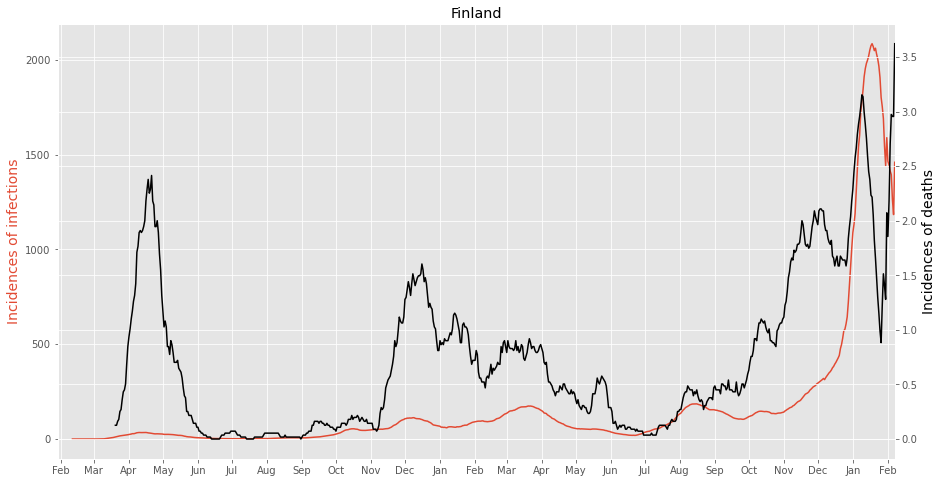

In [6]:
incidences('Finland')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2022-01-25   138985.0        19.0  10160159.0               1.51
2022-01-26    50495.0        75.0  10160159.0               1.48
2022-01-27    41791.0        10.0  10160159.0               1.44
2022-01-28    55180.0        77.0  10160159.0               1.41
2022-01-29        0.0         0.0  10160159.0               1.37
2022-01-30        0.0         0.0  10160159.0               1.33
2022-01-31        0.0         0.0  10160159.0               1.28
2022-02-01   113454.0       106.0  10160159.0               1.24
2022-02-02    39205.0        67.0  10160159.0               1.23
2022-02-03    36541.0        72.0  10160159.0               1.22
2022-02-04    28129.0        80.0  10160159.0               1.21
2022-02-05        NaN         NaN  10160159.0                NaN
2022-02-06        NaN         NaN  10160159.0                NaN
2022-02-07        NaN    

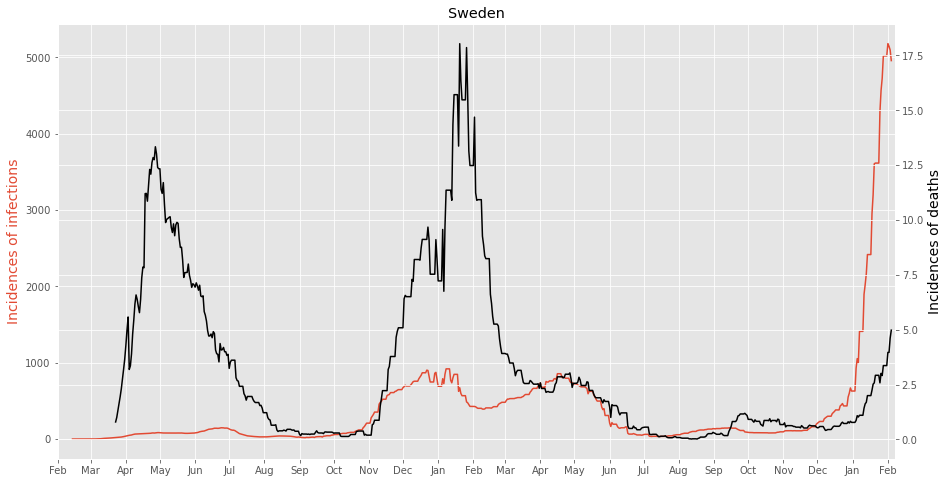

In [7]:
incidences('Sweden')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2022-01-25   179169.0       164.0  83900471.0               1.39
2022-01-26   228608.0       187.0  83900471.0               1.38
2022-01-27   160323.0       170.0  83900471.0               1.37
2022-01-28   184054.0       182.0  83900471.0               1.36
2022-01-29   113190.0        60.0  83900471.0               1.35
2022-01-30    71185.0        60.0  83900471.0               1.34
2022-01-31   179431.0       189.0  83900471.0               1.32
2022-02-01   211277.0       196.0  83900471.0               1.31
2022-02-02   238252.0       164.0  83900471.0               1.30
2022-02-03   248652.0       169.0  83900471.0               1.31
2022-02-04   214386.0       173.0  83900471.0               1.31
2022-02-05   127116.0        41.0  83900471.0                NaN
2022-02-06    82363.0        49.0  83900471.0                NaN
2022-02-07    51377.0    

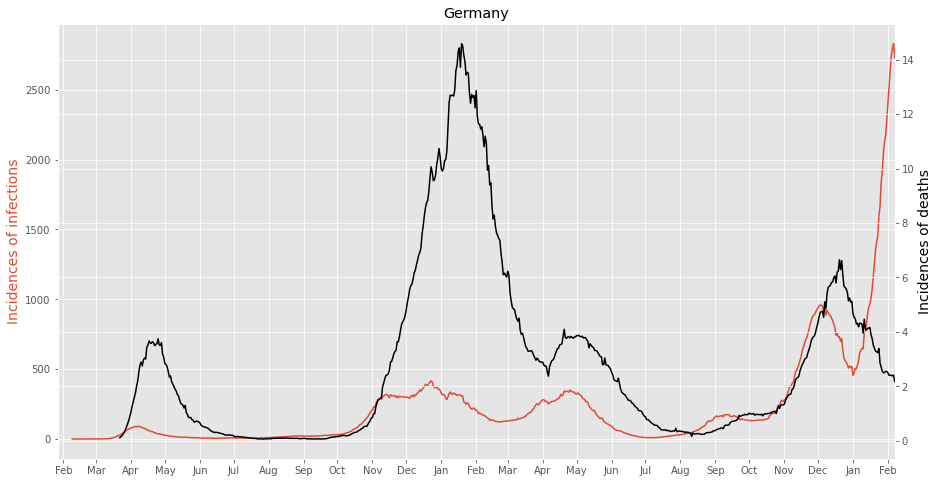

In [8]:
incidences('Germany')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2022-01-25   502507.0       469.0  67422000.0               1.08
2022-01-26   427136.0       256.0  67422000.0               1.05
2022-01-27   392617.0       269.0  67422000.0               1.03
2022-01-28   353503.0       263.0  67422000.0               1.01
2022-01-29   332398.0       178.0  67422000.0               1.00
2022-01-30   249448.0       127.0  67422000.0               0.98
2022-01-31    86376.0       361.0  67422000.0               0.97
2022-02-01   413177.0       368.0  67422000.0               0.95
2022-02-02   315363.0       276.0  67422000.0               0.93
2022-02-03   274352.0       264.0  67422000.0               0.92
2022-02-04   241049.0       355.0  67422000.0               0.91
2022-02-05   214542.0       170.0  67422000.0                NaN
2022-02-06   155439.0       129.0  67422000.0                NaN
2022-02-07    46001.0    

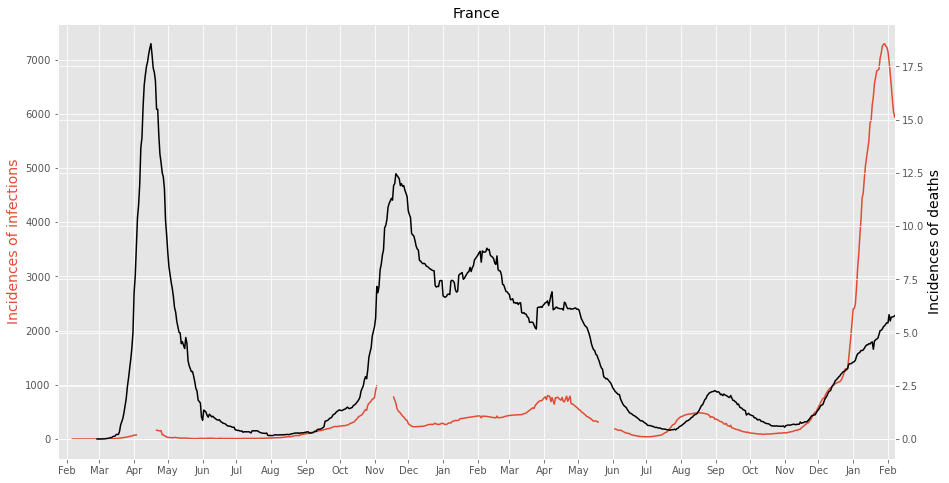

In [9]:
incidences('France')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2022-01-25   114877.0       382.0  46745211.0               0.99
2022-01-26   133553.0       215.0  46745211.0               0.97
2022-01-27   130888.0       176.0  46745211.0               0.95
2022-01-28   118922.0       199.0  46745211.0               0.93
2022-01-29        0.0         0.0  46745211.0               0.90
2022-01-30        0.0         0.0  46745211.0               0.87
2022-01-31   182123.0       259.0  46745211.0               0.84
2022-02-01    77873.0       408.0  46745211.0               0.83
2022-02-02    86222.0       224.0  46745211.0               0.83
2022-02-03    74368.0       183.0  46745211.0               0.83
2022-02-04    74937.0       195.0  46745211.0               0.83
2022-02-05   -74937.0      -195.0  46745211.0                NaN
2022-02-06        0.0         0.0  46745211.0                NaN
2022-02-07   195755.0    

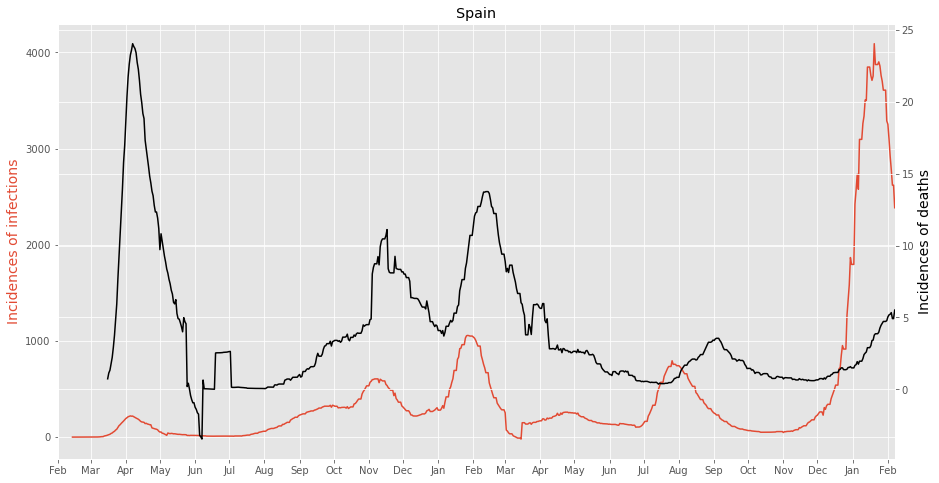

In [10]:
incidences('Spain')

            new_cases  new_deaths  population  reproduction_rate
                                                                
2022-01-25    94507.0       443.0  68207114.0               1.09
2022-01-26   102076.0       346.0  68207114.0               1.19
2022-01-27    96597.0       338.0  68207114.0               1.29
2022-01-28    88910.0       278.0  68207114.0               1.40
2022-01-29    72143.0       296.0  68207114.0               1.53
2022-01-30    62399.0        85.0  68207114.0               1.68
2022-01-31        NaN        57.0  68207114.0               1.84
2022-02-01   112867.0         NaN  68207114.0               1.69
2022-02-02    87419.0       534.0  68207114.0               1.54
2022-02-03    93053.0       323.0  68207114.0               1.45
2022-02-04    82340.0       254.0  68207114.0               1.41
2022-02-05    60114.0       259.0  68207114.0                NaN
2022-02-06    53326.0        75.0  68207114.0                NaN
2022-02-07    64322.0    

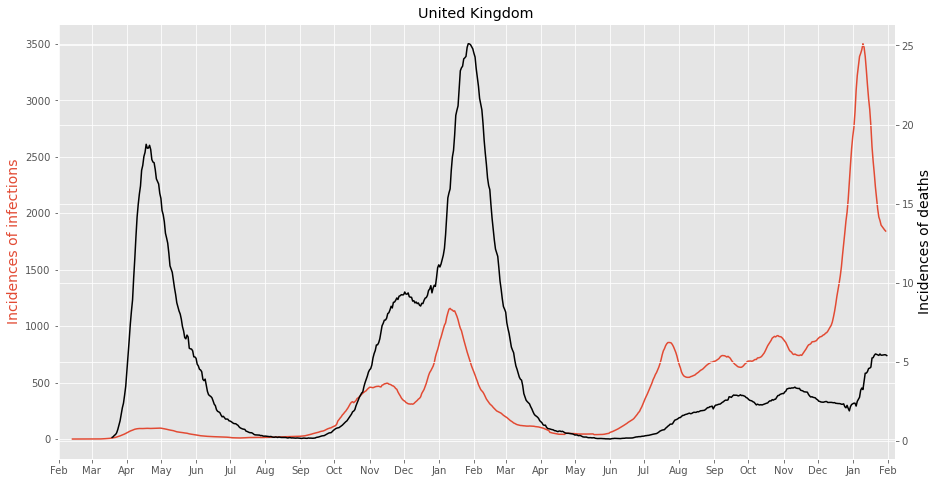

In [11]:
incidences('United Kingdom')

            new_cases  new_deaths   population  reproduction_rate
                                                                 
2022-01-25   555057.0      3039.0  332915074.0               0.81
2022-01-26   651711.0      4068.0  332915074.0               0.79
2022-01-27   488238.0      2387.0  332915074.0               0.78
2022-01-28   601337.0      3888.0  332915074.0               0.76
2022-01-29   169350.0      1077.0  332915074.0               0.74
2022-01-30   192820.0       332.0  332915074.0               0.70
2022-01-31   531418.0      2433.0  332915074.0               0.66
2022-02-01   414045.0      3626.0  332915074.0               0.64
2022-02-02   324611.0      3546.0  332915074.0               0.62
2022-02-03   251066.0      2241.0  332915074.0               0.62
2022-02-04   371447.0      4154.0  332915074.0               0.63
2022-02-05   104104.0       875.0  332915074.0                NaN
2022-02-06    53677.0       369.0  332915074.0                NaN
2022-02-07

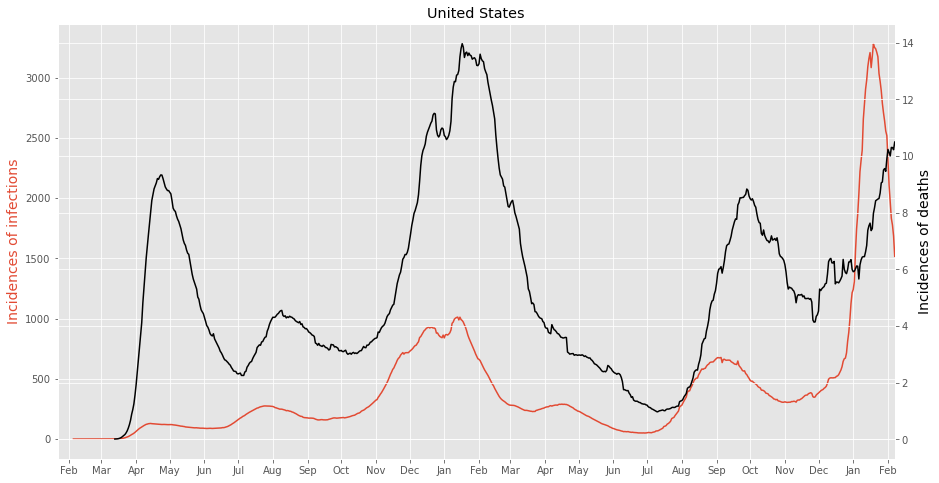

In [12]:
incidences('United States')

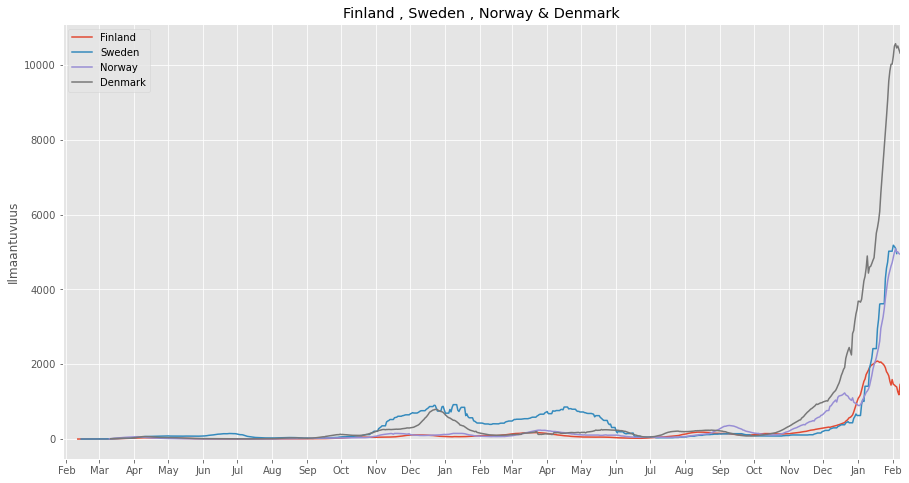

In [13]:
compare4('Finland', 'Sweden', 'Norway', 'Denmark')

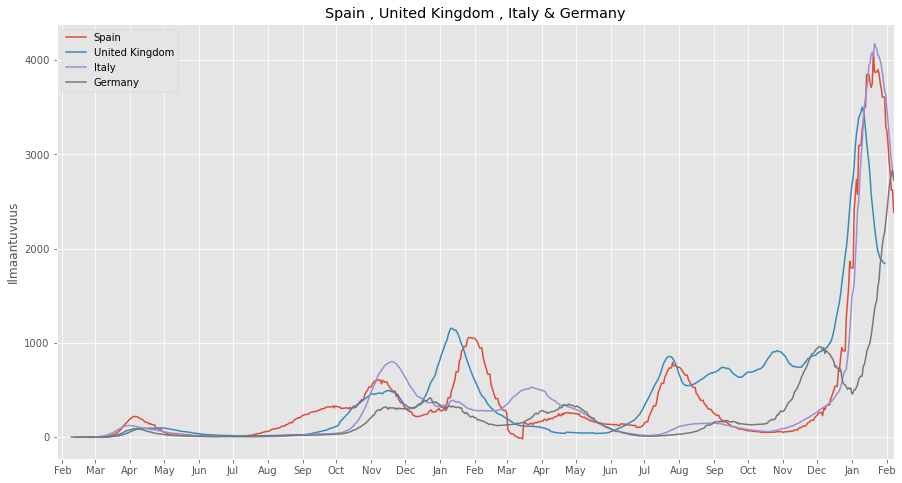

In [14]:
compare4('Spain', 'United Kingdom', 'Italy', 'Germany')

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>